# Identification of digits from sign language images 

In [26]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Import relevant libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [28]:
# Image Settings
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2

In [29]:
# Define get images function
def get_img(data_path):
    # Getting image array from path:
    img = cv2.imread(data_path)
    img = cv2.resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img

## Analyze dataset

Number of samples for digit 0: 205
Number of samples for digit 1: 206
Number of samples for digit 2: 206
Number of samples for digit 3: 206
Number of samples for digit 4: 207
Number of samples for digit 5: 207
Number of samples for digit 6: 207
Number of samples for digit 7: 206
Number of samples for digit 8: 208
Number of samples for digit 9: 204


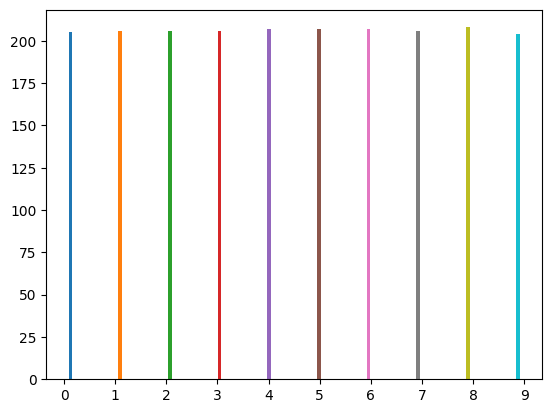

In [30]:
# Plot the number of samples for each sign languagem digit
dataset_path = "dataset/raw/"
data_distribution = {}

labels = os.listdir(dataset_path)  # Getting labels
labels.sort()  # Sorting labels
for i, label in enumerate(labels):
    data_path = dataset_path + label
    for img in os.listdir(data_path):
        img_path = data_path + "/" + img
        img_read = cv2.imread(img_path)

        if label in data_distribution:
            data_distribution[label].append(img_read)
        else:
            data_distribution[label] = [img_read]
    

for label in data_distribution:
    print("Number of samples for digit " + label + ": " + str(len(data_distribution[label])))

#TODO: Plot a better histogram (label each bar with the total number of samples)
counts, edges, bars = plt.hist([[key]*len(data_distribution[key]) for key in data_distribution.keys()], bins=10)
plt.show()
        

- We have a pretty balanced dataset

## Data Preprocessing 

For the preprocessing we will be resizing and converting each image to grayscale. We will also be flatening them

In [31]:
# Resize function
def resize(img):
    width = 50
    height = 50
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

# Convert image to grayscale
def grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

# Flatten image
def flatten(img):
    data = np.array(img)

    flattened = data.flatten()
    return flattened

In [32]:
import pickle
def save_model(filename, model):
    pickle.dump(model, open("models/"+filename, 'wb'))

def load_model(filename):
    return pickle.load(open("models/"+filename, 'rb'))


In [33]:
images = []
labels = []

for label in data_distribution:
    for img in data_distribution[label]:
        img_resized = resize(img)
        img_grayscale = grayscale(img_resized)
        img_flattened = flatten(img_grayscale)

        images.append(img_flattened)
        labels.append(label)
images = np.asarray(images)
labels = np.asarray(labels)

In [34]:
# Split data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=58)   

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1649, 2500) (1649,)
(413, 2500) (413,)


In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

save_model("logistic_regression.sav", logisticRegr)

x_test[0].reshape(1,-1)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
scoretr= logisticRegr.score(x_train, y_train)
print("Test")
print(score)
print("Train")
print(scoretr)

Test
0.7699757869249395
Train
0.9672528805336568


In [36]:
# Decision Tree Model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

save_model("decision_tree.sav", clf)

y_pred_dt=clf.predict(x_test)
y_train_score_dt=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_test, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.5665859564164649
Train 1.0


In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(x_train, y_train)

save_model("random_forest.sav", clf_rft)

y_pred_rft=clf_rft.predict(x_test)
y_train_score_rft=clf_rft.predict(x_train)
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_test, y_pred_rft, normalize=True, sample_weight=None))
print("Train",accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.801452784503632
Train 1.0


In [38]:
# Naive Bayes Classifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)

save_model("naive_bayes.sav", gnb)

y_pred_gnb=gnb.predict(x_test)
y_train_score_gnb=gnb.predict(x_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_test, y_pred_gnb, normalize=True, sample_weight=None))
print("Train",accuracy_score(y_train, y_train_score_gnb, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.6222760290556901
Train 0.6694966646452395
